# Logistic Regression

**Logistic regression** is a statistical learning model that allows predicting the conditional probability of a binary event (response variable) based on the values taken by the predictors (independent variables).

## Odds ratio

Suppose we are interested in predicting whether a specific event or positive class will occur, such as the diagnosis of a disease. We denote the probability of this event occurring as $p$, and therefore, $1−p$ represents the probability of it not occurring.

The odds ratio is calculated as the ratio between the probability of the event occurring ($p$) and the complementary probability ($1−p$):

$$
OR = \frac{p}{1−p}
$$

In other words, the odds ratio is a statistical measure that allows comparing the probability of the event (positive class) with the probability of it not occurring (negative class). It provides a measure of how much more likely an event (belonging to a class) is compared to the probability of it not occurring (belonging to the other class). The following cases can occur:

- $OR > 1$: Indicates that the odds in favor of the event are greater than the odds against it.
- $OR < 1$: Indicates that the odds against the event are greater than the odds in favor.
- $OR = 1$: Suggests that the odds in favor and against are equal.

To illustrate, let's assume $p$ is equal to 0.8; then, the odds ratio would be $\frac{0.8}{0.2}=4$. This indicates that the odds in favor of the event are four times greater than the odds against it.

## Odds Ratio Logarithm

Given that, in general, the probability of the occurrence of the positive class depends on predictor variables $X$, it allows modeling the odds ratio with a function dependent on certain parameters to be estimated using some fitting technique. In many cases of interest, the logarithm of the odds ratio can be modeled with a linear function in predictors $X$, that is:

$$
\log{\left[ \frac{p(X)}{1 - p(X)} \right]} = \theta_0 + \theta_1 X
$$

The quantity on the left-hand side in the above equation is known as the ***log odds*** or ***logit***.

From the above equation, we can derive the dependency of the probability of positive cases in terms of the predictor:

$$ 
\frac{p(X)}{1 - p(X)} = e^{\theta_0 + \theta_1 X}
$$

$$
\Rightarrow p(X) = \frac{e^{\theta_0 + \theta_1 X}}{1 + e^{\theta_0 + \theta_1 X}}
$$

$$
\Rightarrow p(X) = \frac{1}{1 + e^{-\left( \theta_0 + \theta_1 X \right)}}
$$

The function on the right-hand side of the last expression is known as the **sigmoid function** or **logistic function**. From this model, we can calculate the probability of positive cases by estimating the parameters $\theta_0$ and $\theta_1$ from the training data. In other words, given a set of observations $TD = \{ (x_i, y_i), y_i = 0,1 \}$ where the probability of $y_i$ is:

$$
p_i = p(x_i) = \frac{1}{1 + e^{-\left( \theta_0 + \theta_1 X \right)}}
$$

We want to find the set of parameters $\theta_0$ and $\theta_1$ that best fit the training data. Then, binary classification will be determined by a threshold value of \(p_i\) (or equivalently \(1-p_i\)), which is generally set to 0.5. Thus, the following cases could occur:

- $y_i = 1 \iff p_i \geq 0.5 \iff \theta_0 + \theta_1 x_i \leq 0$
- $y_i = 0 \iff p_i < 0.5 \iff \theta_0 + \theta_1 x_i > 0$

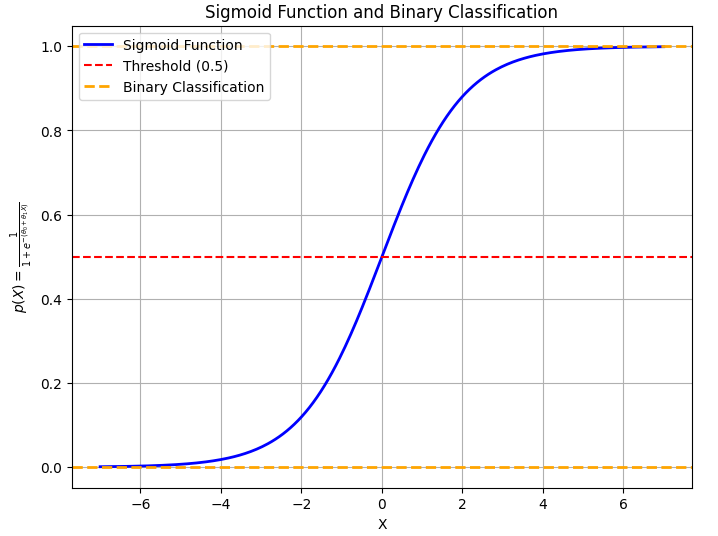

## Parameter Estimation in Logistic Regression through Maximum Likelihood

### Bernoulli Trials

A **Bernoulli trial** refers to a **random experiment** with only two possible outcomes, usually labeled as success and failure, in honor of Jakob Bernoulli.

From a probabilistic standpoint, these trials are modeled by a random variable that can take only two values, 0 and 1, with 1 represent success.

The probability distribution associated with this type of trial is given by:

$$
P(X=k)=p^k \cdot (1−p)^{1−k}
$$

This distribution is known as the Bernoulli distribution. On the other hand, Bernoulli processes emerge when identical and independent Bernoulli trials are repeated over time. The probability of obtaining x successes in N trials is given by the binomial distribution:

$$ 
P(X=x) = \binom{N}{x} \cdot p^x \cdot (1-p)^{N-x}
$$

### Bernoulli Distributions and Maximum Likelihood Estimation for Logistic Regression

In logistic regression, we model the probability of a binary outcome (usually represented as 0 or 1) given a set of predictor variables. This probability follows a Bernoulli distribution, which is defined by the probability mass function:

$$
f(y_i, p) = p^{y_i} \cdot (1 - p)^{1 - y_i}
$$

Here, $y_i$ represents the binary outcome (0 or 1), and $p$ represents the probability of the outcome being 1.

Consider a training dataset $\mathrm{TD}$ consisting of $N$ observations, each associated with $M$ predictors. Let $y_i$ be the binary outcome for the $i$-th observation, where $y_i$ can take values 0 or 1. The predictors for the $i$-th observation are denoted as $x_{ij}$, where $j$ ranges from 1 to $M$.

Our goal is to determine the parameters $\vec{\theta} := (\theta_0, \theta_1, \dots, \theta_M)$ that best fit the logistic regression model to the training data. To achieve this objective we use the **maximum likelihood method**.

The likelihood function $L(\vec{\theta})$ represents the product of the joint probabilities of observing the data points given the parameter values. In logistic regression, it's the product of the individual Bernoulli probabilities for each observation.

$$
\begin{split}
L(\vec{\theta}) & = \prod_{i=1}^N f(Y = y_i | X = x_i) \\
& = \prod_{i=1}^N p(x_i, \vec{\theta})^{y_i}\left[1 - p(x_i, \vec{\theta})\right]^{1 - y_i }
\end{split}
$$

Here, $p(x_i, \vec{\theta})$ is the logistic function, which models the probability of the binary outcome being 1 given the predictors $x_i$ and the parameter vector $\vec{\theta}$.

To find the parameters $\vec{\theta}$ that maximize the likelihood function, we typically take the logarithm of the likelihood function and then use numerical optimization techniques. We use the log-likelihood insted likelihood, because it simplifies the calculations and because the logarithm is a monotone function, that is, it preserves the order of the values. Therefore, maximizing the log-likelihood is equivalent to maximizing the likelihood function itself, since the logarithm function is strictly increasing.

$$
\begin{split}
l(\vec{\theta}) = \log \left[L(\vec{\theta}) \right] & = \ln \left[ \prod_{i=1}^N f(Y = y_i | X = x_i) \right] \\
& = \sum_{i=1}^N y_i \log p(x_i, \vec{\theta}) + (1 - y_i)\log\left[ 1 - p(x_i, \vec{\theta}) \right] \\
& = \sum_{i=1}^N \log\left[ 1 - p(x_i, \vec{\theta}) \right] + y_i \biggl\{ \log p(x_i, \vec{\theta}) - \log\left[ 1 - p(x_i, \vec{\theta}) \right] \biggr\} \\
& = \sum_{i=1}^N \log\left[ 1 - p(x_i, \vec{\theta}) \right] + \sum_{i=1}^N y_i  \log \frac{p(x_i, \vec{\theta})}{1 - p(x_i, \vec{\theta})} \\
& = - \sum_{i=1}^N \log\left[ 1+\exp \left( \theta_0 + \sum_{j=1}^M x_{ij} \theta_j \right) \right] + \sum_{i=1}^N y_i \left(\theta_0 + \sum_{j=1}^M x_{ij} \theta_j \right)
\end{split}
$$

In the equation above we have used that:

$$
\begin{split}
1 - p(x_i, \vec{\theta}) & = 1 - \frac{1}{1+\exp \left[-\left( \theta_0 + \sum_{j=1}^M x_{ij} \theta_j \right)\right]} \\
& = \frac{\exp \left[-\left( \theta_0 + \sum_{j=1}^M x_{ij} \theta_j \right)\right]}{1+\exp \left[-\left( \theta_0 + \sum_{j=1}^M x_{ij} \theta_j \right)\right]} \\
& = \frac{1}{1+\exp \left( \theta_0 + \sum_{j=1}^M x_{ij} \theta_j \right)}
\end{split}
$$

$$
\begin{split}
\frac{\partial l}{\partial \theta_j} & = - \sum_{i=1}^N \frac{1}{1 + \exp \left(\theta_0 + \sum_{j=1}^M x_{ij} \theta_j \right)}\exp \left(\theta_0 + \sum_{j=1}^M x_{ij} \theta_j \right)x_{ij} + \sum_{i=1}^N y_i x_{ij}\\
& = \sum_{i=1}^N \left[ y_i - p(x_i, \vec{\theta}) \right]x_{ij} = 0 \,\,\, \forall j = 1, 2, \dots, M
\end{split}
$$

which correspond to a set of $M$ equations that will be solved using the **Newton-Raphson method** and in which it is required to know $\frac{\partial^2 l}{\partial \theta_j^2}$:

$$
\begin{split}
\frac{\partial^2 l}{\partial \theta_j^2} & = \sum_{i=1}^N \left[ y_i - p(x_i, \vec{\theta}) \right]x_{ij} \\
& = \sum_{i=1}^N \left[ \frac{\partial p(x_i, \vec{\theta})}{\partial \theta_j} \right]x_{ij} \\
& = \sum_{i=1}^N - \frac{1}{\biggl\{1+\exp \left[-\left( \theta_0 + \sum_{j=1}^M x_{ij} \theta_j \right)\right]\biggr\}^2} \biggl\{\exp \left[-\left( \theta_0 + \sum_{j=1}^M x_{ij} \theta_j \right)\right] \biggr\} x_{ij} \\
& = \sum_{i=1}^N \frac{1}{1+\exp \left[-\left( \theta_0 + \sum_{j=1}^M x_{ij} \theta_j \right)\right]}\frac{\exp \left[-\left( \theta_0 + \sum_{j=1}^M x_{ij} \theta_j \right)\right]}{1+\exp \left[-\left( \theta_0 + \sum_{j=1}^M x_{ij} \theta_j \right)\right]} x_{ij} \\
& = \sum_{i=1}^N p(x_i, \vec{\theta}) \left[1 - p(x_i, \vec{\theta}) \right]x_{ij}
\end{split}
$$

To implement Newton's method:

$$
\left\{
\begin{array}{l}
f(\vec{\theta}) =  \frac{\partial l}{\partial \theta_j} = \sum_{i=1}^N \left[ y_i - p(x_i, \vec{\theta}) \right]x_{ij} \\
f'(\vec{\theta}) = \frac{\partial^2 l}{\partial \theta_j^2} = \sum_{i=1}^N p(x_i, \vec{\theta}) \left[1 - p(x_i, \vec{\theta}) \right]x_{ij}
\end{array}
\right.
$$

and considering an initial value, say $\vec{\theta} = \vec{0}$ we can iterate the procedure to obtain the successive approximations by:

$$
\vec{\theta}^{(n+1)} =  \vec{\theta}^{(n)} - \frac{f\left[\vec{\theta}^{(n)}\right]}{f'\left[\vec{\theta}^{(n)}\right]}
$$

## `Python` implementation of Logistic Regression

In [24]:
def logistic_regression_log_likelihood(X, y, theta):
    """
    Compute the log-likelihood for logistic regression.

    Parameters:
    X : numpy array, shape (N, 2)
        Feature matrix where each row represents a sample and each column represents a feature.
        The first column should be filled with ones for the intercept term.
    y : numpy array, shape (N,)
        Target variable vector where each element represents the class label (0 or 1).
    theta : numpy array, shape (2,)
        Parameter vector for logistic regression. theta[0] is the intercept, and theta[1] is the coefficient for the predictor.

    Returns:
    log_likelihood : float
        Log-likelihood value.
    """
    N = len(y)  # Number of samples
    z = X@theta  # Compute linear combination of features and parameters
    prob = 1 / (1 + np.exp(-z))  # Calculate probability of class 1
    log_likelihood = -np.sum(np.log(1 + np.exp(z))) + np.sum(y * z)  # Compute log-likelihood

    return log_likelihood

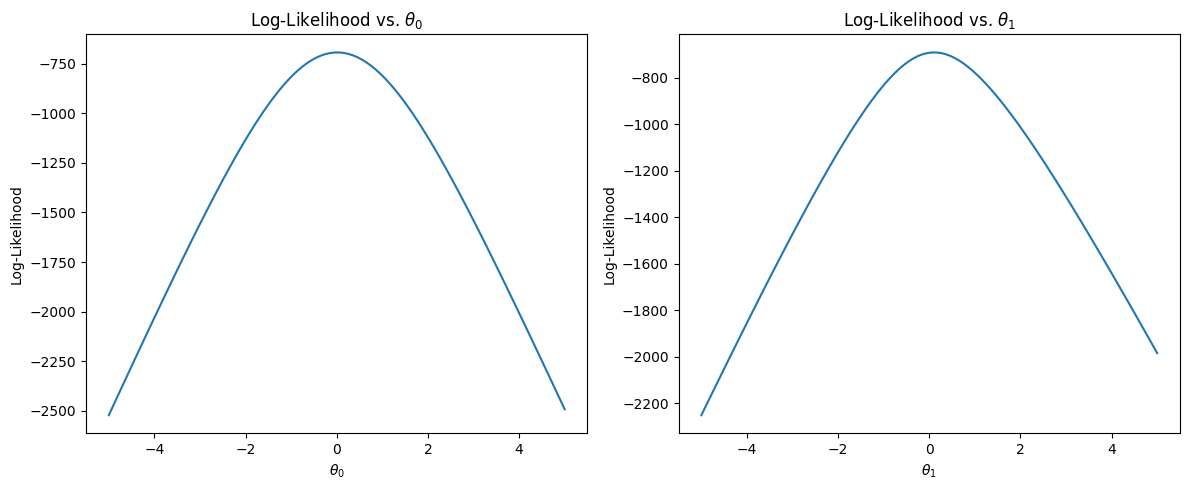

In [25]:
# Generate sample data
N = 1000
X = np.column_stack((np.ones(N), np.random.randn(N)))
y = np.random.randint(2, size=N)

# Define range of values ​​for theta0 and theta1
theta0_range = np.linspace(-5, 5, 100)
theta1_range = np.linspace(-5, 5, 100)

# Calculate log-likelihood for each value of theta0 and theta1
log_likelihood_theta0 = np.zeros_like(theta0_range)
log_likelihood_theta1 = np.zeros_like(theta1_range)

for i in range(len(theta0_range)):
    theta = np.array([theta0_range[i], 0])  # Keep theta1 constant at 0
    log_likelihood_theta0[i] = logistic_regression_log_likelihood(X, y, theta)

for i in range(len(theta1_range)):
    theta = np.array([0, theta1_range[i]]) # Keep theta0 constant at 0
    log_likelihood_theta1[i] = logistic_regression_log_likelihood(X, y, theta)

# Create plots
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(theta0_range, log_likelihood_theta0)
plt.xlabel(r'$\theta_0$')
plt.ylabel('Log-Likelihood')
plt.title(r'Log-Likelihood vs. $\theta_0$')

plt.subplot(1, 2, 2)
plt.plot(theta1_range, log_likelihood_theta1)
plt.xlabel(r'$\theta_1$')
plt.ylabel('Log-Likelihood')
plt.title(r'Log-Likelihood vs. $\theta_1$')

plt.tight_layout()
plt.show()

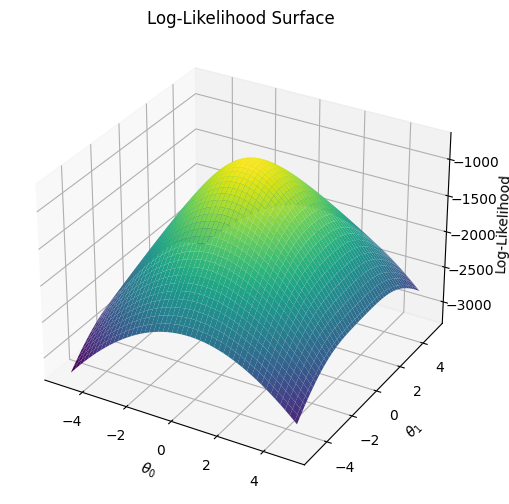

In [26]:
from mpl_toolkits.mplot3d import Axes3D

# Generate sample data
N = 1000
X = np.column_stack((np.ones(N), np.random.randn(N)))
y = np.random.randint(2, size=N)

# Define range of values ​​for theta0 and theta1
theta0_range = np.linspace(-5, 5, 100)
theta1_range = np.linspace(-5, 5, 100)
theta0_grid, theta1_grid = np.meshgrid(theta0_range, theta1_range)

# Calculate log-likelihood for each combination of theta0 and theta1
log_likelihood_grid = np.zeros_like(theta0_grid)
for i in range(len(theta0_range)):
    for j in range(len(theta1_range)):
        theta = np.array([theta0_range[i], theta1_range[j]])
        log_likelihood_grid[j, i] = logistic_regression_log_likelihood(X, y, theta)

# Create 3D plots
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(theta0_grid, theta1_grid, log_likelihood_grid, cmap='viridis')
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel('Log-Likelihood')
ax.set_title('Log-Likelihood Surface')
plt.show()

In [27]:
def logistic_regression_log_likelihood_derivative(X, y, theta):
    """
    Compute the derivative of the log-likelihood function for logistic regression.

    Parameters:
    X : numpy array, shape (N, M)
        Feature matrix where each row represents a sample and each column represents a feature.
        The first column should be filled with ones for the intercept term.
    y : numpy array, shape (N,)
        Target variable vector where each element represents the class label (0 or 1).
    theta : numpy array, shape (M,)
        Parameter vector for logistic regression.

    Returns:
    derivative : numpy array, shape (M,)
        Derivative of the log-likelihood function with respect to each parameter.
    """
    z = X@theta
    prob = 1 / (1 + np.exp(-z))
    derivative = X.T@(y - prob)
    return derivative

def logistic_regression_log_likelihood_second_derivative(X, y, theta):
    """
    Compute the second derivative of the log-likelihood function for logistic regression.

    Parameters:
    X : numpy array, shape (N, M)
        Feature matrix where each row represents a sample and each column represents a feature.
        The first column should be filled with ones for the intercept term.
    y : numpy array, shape (N,)
        Target variable vector where each element represents the class label (0 or 1).
    theta : numpy array, shape (M,)
        Parameter vector for logistic regression.

    Returns:
    second_derivative : numpy array, shape (M, M)
        Second derivative of the log-likelihood function with respect to each parameter.
    """
    z = np.dot(X, theta)
    prob = 1 / (1 + np.exp(-z))
    W = np.diag(prob * (1 - prob))
    second_derivative = - X.T @ W @ X
    return second_derivative

def newton_raphson(X, y, initial_theta, max_iter, tol):
    """
    Apply the Newton-Raphson optimization method to find the optimal parameters for logistic regression.

    Parameters:
    X : numpy array, shape (N, M)
        Feature matrix where each row represents a sample and each column represents a feature.
        The first column should be filled with ones for the intercept term.
    y : numpy array, shape (N,)
        Target variable vector where each element represents the class label (0 or 1).
    initial_theta : numpy array, shape (M,)
        Initial guess for the parameter vector.
    max_iter : int, optional
        Maximum number of iterations for the optimization algorithm. Default is 100.
    tol : float, optional
        Tolerance for the convergence criterion. The optimization stops when the change in parameters
        is smaller than this value. Default is 1e-6.

    Returns:
    theta : numpy array, shape (M,)
        Optimal parameter vector found by the Newton-Raphson method.
    """
    theta = initial_theta
    iter_count = 0
    while iter_count < max_iter:
        f = logistic_regression_log_likelihood_derivative(X, y, theta)
        f_prime = logistic_regression_log_likelihood_second_derivative(X, y, theta)
        theta += -np.linalg.inv(f_prime) @ f
        
        # Check for convergence
        if np.linalg.norm(f) < tol:
            break
        
        iter_count += 1
    
    return theta

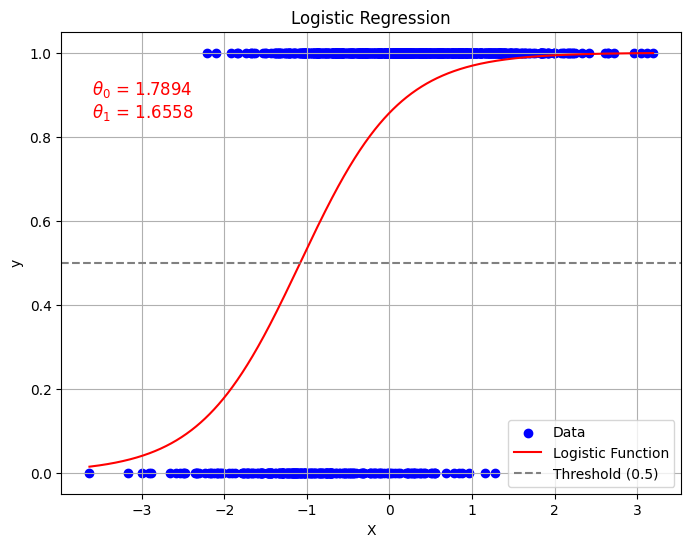

In [28]:
np.random.seed(12)

def generate_logistic_data(N, M, noise=0.1):
    """
    Generate synthetic logistic regression data.

    Parameters:
    N : int
        Number of samples.
    noise : float, optional
        Standard deviation of the Gaussian noise to be added to the data. Default is 0.1.

    Returns:
    X : numpy array, shape (N, 2)
        Feature matrix with an additional column for the intercept term.
    y : numpy array, shape (N,)
        Target variable vector.
    """
    # Generate feature matrix with intercept column
    X = np.random.randn(N, 1)
    intercept_column = np.ones((N, 1))
    X = np.hstack((intercept_column, X))

    # Generate parameter vector for generating data
    true_theta = np.random.randn(M)

    # Generate target variable based on logistic function
    z = X @ true_theta
    prob = 1 / (1 + np.exp(-z))
    y = np.random.binomial(1, prob)

    # Add Gaussian noise to the features
    X[:, 1] += np.random.normal(scale=noise, size=(N,))

    return X, y

# Generate example data
N = 1000
M = 2
X, y = generate_logistic_data(N, M)

# Initial value of theta
initial_theta = np.zeros(M)

# Number of iterations
n_iter = 1e6

# Tolerance
tol = 1e-6

# Apply the Newton-Raphson method
theta_optimal = newton_raphson(X, y, initial_theta, n_iter, tol)

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 1], y, color='blue', label='Data')
plt.xlabel('X')
plt.ylabel('y')

# Plot the logistic function with optimal parameters
x_values = np.linspace(min(X[:, 1]), max(X[:, 1]), N)
logistic_function = 1 / (1 + np.exp(-(theta_optimal[0] + theta_optimal[1] * x_values)))
plt.plot(x_values, logistic_function, color='red', label='Logistic Function')

# Plot threshold line at 0.5
plt.axhline(y=0.5, color='gray', linestyle='--', label='Threshold (0.5)')

# Display the optimal parameters
plt.text(0.05, 0.9, fr'$\theta_0$ = {theta_optimal[0]:.4f}', 
         transform=plt.gca().transAxes, fontsize=12, 
         verticalalignment='top', color='red')
plt.text(0.05, 0.85, fr'$\theta_1$ = {theta_optimal[1]:.4f}', 
         transform=plt.gca().transAxes, fontsize=12, 
         verticalalignment='top', color='red')

plt.title('Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()